In [1]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
perf_record = pickle.load(open('./perf_rgn.pickle', 'r'))

In [3]:
perf_record = pd.DataFrame(perf_record)

In [4]:
perf_record['total'] = perf_record['hmmer'] + perf_record['rgn_predict'] + perf_record['tfrecord']
perf_record['prep'] = perf_record['hmmer'] + perf_record['tfrecord']
perf_record.head(3)

,hmmer,id,n_res,rgn_predict,tfrecord,total,prep
0,1017.883576,T0859,133,30.191978,2.574380,1050.649934,1020.457956
1,1028.230182,T0860,137,27.854602,2.291012,1058.375796,1030.521194
2,3198.157239,T0861,323,35.689695,2.611003,3236.457937,3200.768242


In [6]:
# %run ~/.matplotlib.py

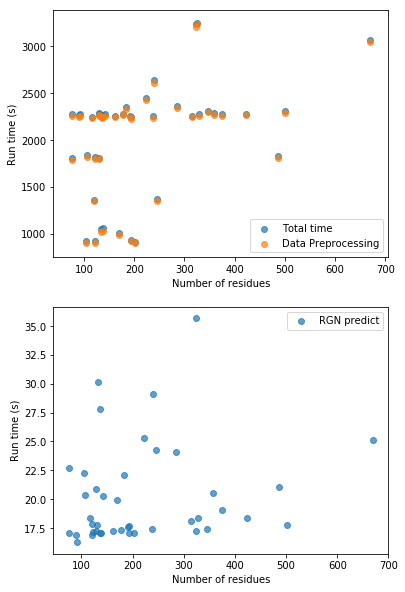

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10)) 

ax1.scatter(perf_record['n_res'], perf_record['total'], alpha=.7, label='Total time') 
ax1.scatter(perf_record['n_res'], perf_record['prep'], alpha=.7, label='Data Preprocessing') 

ax1.legend(loc='lower right')
# ax1.set_ylim([0, 4000]) 
ax1.set_xlabel('Number of residues') 
ax1.set_ylabel('Run time (s)')
# plt.scatter(perf_record['n_res'], perf_record['hmmer'], label=perf_record['id'])


ax2.scatter(perf_record['n_res'], perf_record['rgn_predict'], alpha=.7, label='RGN predict') 

ax2.legend()
# ax1.set_ylim([0, 4000]) 
ax2.set_xlabel('Number of residues') 
ax2.set_ylabel('Run time (s)') 

plt.savefig('rgn_runtime.pdf', bbox_inches='tight')

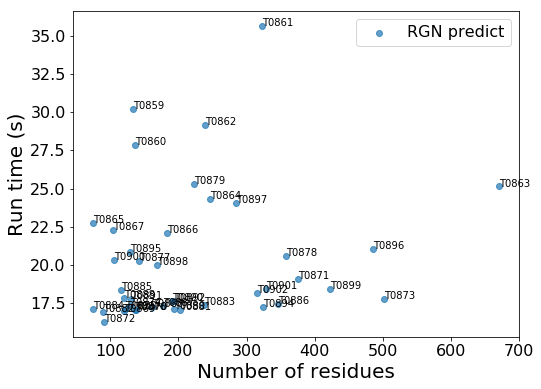

In [18]:
fig, ax = plt.subplots(figsize=(8, 6)) 


ax.scatter(perf_record['n_res'], perf_record['rgn_predict'], alpha=.7, label='RGN predict') 

for label, x, y in zip(perf_record['id'], perf_record['n_res'], perf_record['rgn_predict']):
    ax.annotate(label, (x, y))
    
ax.legend(fontsize=16)
# ax1.set_ylim([0, 4000]) 
ax.set_xlabel('Number of residues', fontsize=20) 
ax.set_ylabel('Run time (s)', fontsize=20) 
plt.tick_params( labelsize=16) 

plt.savefig('rgn_only_runtime.pdf', bbox_inches='tight')